## Lab 5 - Using link functions to create generalized linear models
### Mateusz Floras

In [104]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
df = pd.read_csv("Airline_data.csv")
df.head()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0


### Prior predictive checks

In [106]:
model_ppc=CmdStanModel(stan_file='model_ppc.stan')
R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


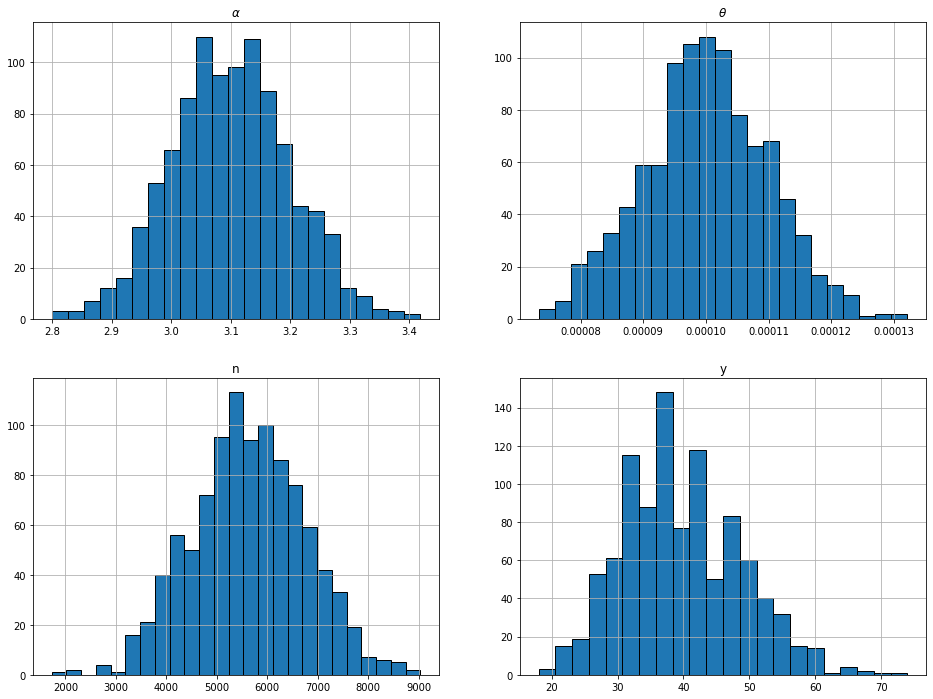

In [107]:
df_sim = sim.draws_pd()

fig, axs = plt.subplots(2,2, figsize=(16,12))

axs[0,0].hist(df_sim["alpha"], bins='auto', ec='black')
axs[0,0].set_title(r'$\alpha$')
axs[0,0].grid()

axs[0,1].hist(df_sim["theta"], bins='auto', ec='black')
axs[0,1].set_title(r'$\theta$')
axs[0,1].grid()

axs[1,0].hist(df_sim["n"], bins='auto', ec='black')
axs[1,0].set_title("n")
axs[1,0].grid()

axs[1,1].hist(df_sim["y"], bins='auto', ec='black')
axs[1,1].set_title("y")
axs[1,1].grid()

plt.show()

### Posterior predictive checks

In [108]:
model_fit=CmdStanModel(stan_file='model_fit.stan')
data_fit = {'N': df.shape[0], 'n': df["Miles flown [100 mln miles]"].values, 'y': df["Fatal accidents"].values}
sim=model_fit.sample(data=data_fit, seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)







chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


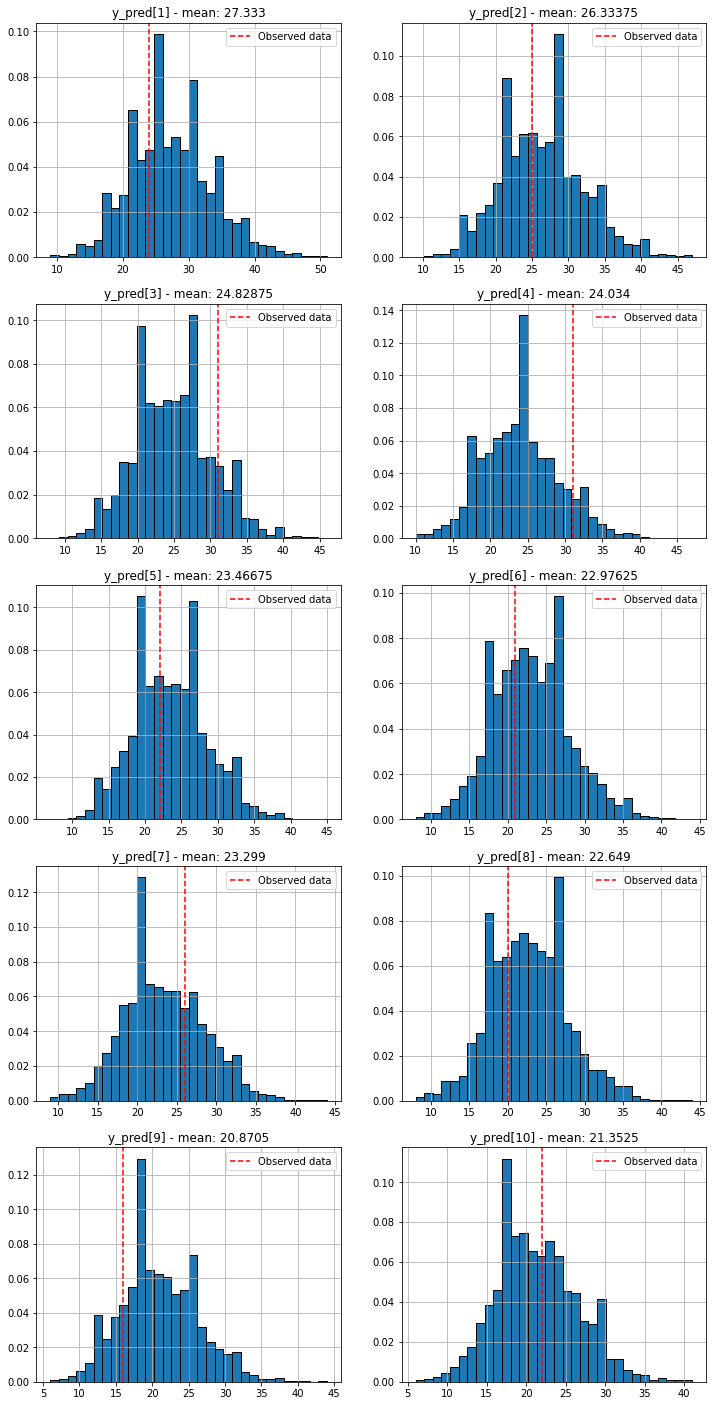

In [109]:
data_fit = sim.draws_pd()
df_fit = data_fit.loc[:, "y_pred[1]":]
col=1
fig, axs = plt.subplots(5, 2, figsize=(12,25))
for i in range(5):
    for j in range(2):
        axs[i,j].hist(df_fit["y_pred[{}]".format(col)], bins=32, ec='black', density=True)
        axs[i,j].grid()
        y_pred_mean = df_fit["y_pred[{}]".format(col)].mean()
        axs[i,j].set_title("y_pred[{}] - mean: {}".format(col, y_pred_mean))
        axs[i,j].axvline(df['Fatal accidents'].iloc[col-1], linestyle='--', color='r', label="Observed data")
        axs[i,j].legend()
        col+=1

plt.show()

For the examples where the amount of observed fatal accidents is between 21 and 26, mean predicted value of accidents is similar to original data. For other examples this difference is definitely too big.

### Improved posterior predictive checks

In [110]:
model_fit=CmdStanModel(stan_file='model_final.stan')
data_fit = {'N': df.shape[0], 'n': df["Miles flown [100 mln miles]"].values, 'y': df["Fatal accidents"].values}
sim=model_fit.sample(data=data_fit, seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1


INFO:cmdstanpy:CmdStan done processing.


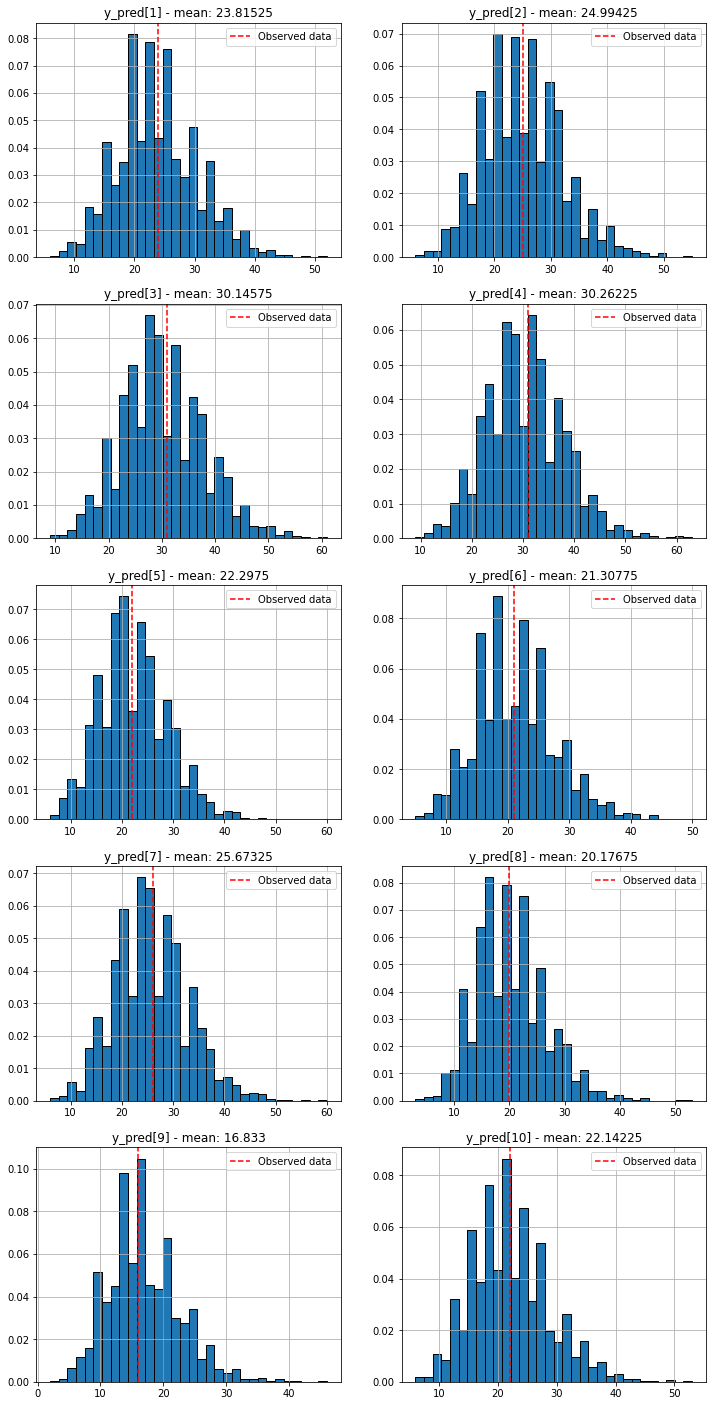

In [111]:
data_fit = sim.draws_pd()
df_fit = data_fit.loc[:, "y_pred[1]":]
col=1
fig, axs = plt.subplots(5, 2, figsize=(12,25))

for i in range(5):
    for j in range(2):
        axs[i,j].hist(df_fit["y_pred[{}]".format(col)], bins=32, ec='black', density=True)
        axs[i,j].grid()
        y_pred_mean = df_fit["y_pred[{}]".format(col)].mean()
        axs[i,j].set_title("y_pred[{}] - mean: {}".format(col, y_pred_mean))
        axs[i,j].axvline(df['Fatal accidents'].iloc[col-1], linestyle='--', color='r', label="Observed data")
        axs[i,j].legend()
        col+=1

plt.show()

For improved model, predictions are definitely more similiar to observed data. In every example, dfference between mean predictive value of accidents and real value of accidents is smaller than 1.